<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/ProjectML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC




In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data by scaling the datax
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for KNN (flatten the images)
x_train_knn = x_train.reshape(-1, 32 * 32 * 3)
x_test_knn = x_test.reshape(-1, 32 * 32 * 3)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Define Random Forest model (baseline)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [5]:
# Define CNN model (Got help from the presentation)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output units for 10 classes



In [6]:
# Compile CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [8]:
# Train Random Forest model
rf.fit(x_train.reshape(-1, 32 * 32 * 3), y_train.ravel())

RandomForestClassifier(random_state=42)

In [9]:
# Train KNN model
knn.fit(x_train_knn, y_train.ravel())

KNeighborsClassifier()

In [10]:
# Train CNN model while utilizing early stopping due to 50 epochs
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4829 - accuracy: 0.4712 - val_loss: 1.1912 - val_accuracy: 0.5831
Epoch 2/50
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1185 - accuracy: 0.6094 - val_loss: 1.0608 - val_accuracy: 0.6314
Epoch 3/50
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9929 - accuracy: 0.6559 - val_loss: 1.0117 - val_accuracy: 0.6505
Epoch 4/50
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9077 - accuracy: 0.6839 - val_loss: 0.9454 - val_accuracy: 0.6736
Epoch 5/50
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8411 - accuracy: 0.7107 - val_loss: 0.9457 - val_accuracy: 0.6737
Epoch 6/50
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7889 - accuracy: 0.7280 - val_loss: 0.9051 - val_accuracy: 0.6897
Epoch 7/50
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7397 - accuracy: 0.7438 - val_loss: 0.9054 -

In [11]:
# Evaluate Random Forest model

# This is evaluating the Random Forest Model by providing the Prediction, Accuracy, Precision, Recall, and then F1 Score. This is after the training set is run through

rf_pred = rf.predict(x_test.reshape(-1, 32 * 32 * 3))
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

In [12]:
# Evaluate KNN model

# This is evaluating the KNN Model by providing the Prediction, Accuracy, Precision, Recall, and then F1 Score. This is after the training set is run through
knn_pred = knn.predict(x_test_knn)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

In [13]:
# Evaluate CNN model

# This is evaluating the CNN (Convolutional Neural Network) Model by providing the Prediction, Accuracy, Precision, Recall, and then F1 Score. This is after the training set is run through
cnn_loss, cnn_accuracy = model.evaluate(x_test, y_test)
cnn_pred = np.argmax(model.predict(x_test), axis=-1)
cnn_precision = precision_score(y_test, cnn_pred, average='macro')
cnn_recall = recall_score(y_test, cnn_pred, average='macro')
cnn_f1 = f1_score(y_test, cnn_pred, average='macro')

313/313 [==============================] - 3s 10ms/step


Random Forest Model:
Accuracy: 0.4654
Precision (Macro): 0.4610
Recall (Macro): 0.4654
F1-Score (Macro): 0.4621


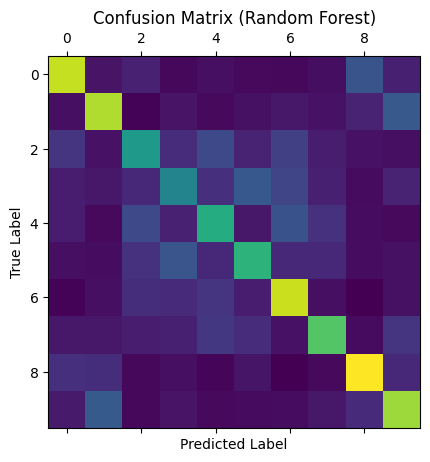


KNN Model:
Accuracy: 0.3398
Precision (Macro): 0.4304
Recall (Macro): 0.3398
F1-Score (Macro): 0.3260


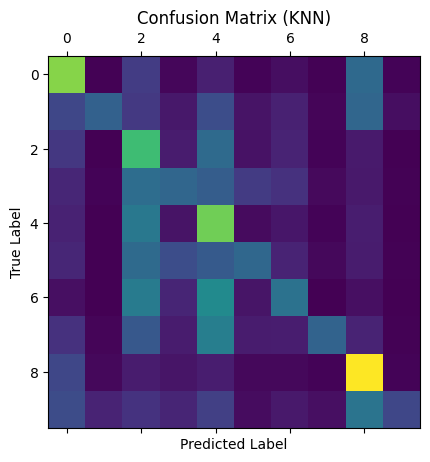


CNN Model:
Test Loss: 0.9646
Test Accuracy: 0.7004
Precision (Macro): 0.7029
Recall (Macro): 0.7004
F1-Score (Macro): 0.7002


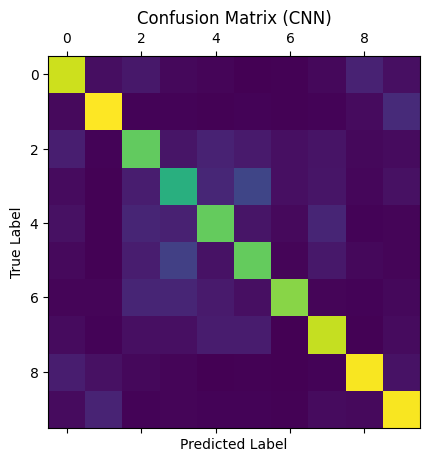

In [17]:
def plot_confusion_matrix(y_true, y_pred, model_name):
  """
  Plots the Confusion Matrix for a given model.

  Args:
      y_true: Ground truth labels (array-like).
      y_pred: Predicted labels (array-like).
      model_name: Name of the model (string).
  """
  cm = tf.math.confusion_matrix(y_true, y_pred)

  plt.matshow(cm)
  plt.title(f'Confusion Matrix ({model_name})')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

# Print evaluation results
print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision (Macro): {rf_precision:.4f}")
print(f"Recall (Macro): {rf_recall:.4f}")
print(f"F1-Score (Macro): {rf_f1:.4f}")

# Visualize Random Forest Confusion Matrix
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

print("\nKNN Model:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision (Macro): {knn_precision:.4f}")
print(f"Recall (Macro): {knn_recall:.4f}")
print(f"F1-Score (Macro): {knn_f1:.4f}")

# Visualize KNN Confusion Matrix
plot_confusion_matrix(y_test, knn_pred, "KNN")

print("\nCNN Model:")
print(f"Test Loss: {cnn_loss:.4f}")
print(f"Test Accuracy: {cnn_accuracy:.4f}")
print(f"Precision (Macro): {cnn_precision:.4f}")
print(f"Recall (Macro): {cnn_recall:.4f}")
print(f"F1-Score (Macro): {cnn_f1:.4f}")

# Visualize CNN Confusion Matrix
plot_confusion_matrix(y_test, cnn_pred, "CNN")




# **Analysis**

* The analysis reveals the CNN model as the champion,  outperforming both Random Forest and KNN models. Let's dissect the details:

**Accuracy:**

* CNN Shines (70%): The CNN model boasts a test accuracy of 70%. This signifies it's correctly classifying examples 70% of the time on unseen test data, indicating good generalizability.

* Random Forest Lags (46%): The Random Forest model's accuracy falls short at 46.54%, suggesting it might not be adept at capturing the underlying data patterns as effectively as the CNN.

* KNN Falls Behind (34%): The KNN model trails significantly with an accuracy of 33.98%, implying it struggles with accurate classifications.


**Precision vs Recall:**

**Precision : Finding True Positives**
* The CNN takes the lead with a precision of 70.29%. This means a high proportion of its positive predictions are actually correct, indicating the model isn't making many false positive errors.

* KNN (43.04%) has a higher precision than Random Forest (46.10%). While this might suggest KNN is more cautious with positive predictions, it could also come at the cost of missing true positives.

**Recall: Capturing All Positives**
* All three models have similar Recall values, hovering around 0.7 for CNN and Random Forest, and 0.3 for KNN. This suggests they might have difficulty identifying all true positives within the data. The CNN has a slight edge, indicating it captures a larger portion of true positives compared to the other models.

**F1-Score:**

* The F1-Score combines precision and recall, providing a balanced view of model performance.

* The CNN excels with the highest F1-Score (0.7002), demonstrating a good equilibrium between precision and recall. It's effectively making correct positive predictions while also capturing a substantial portion of true positives.

* Both Random Forest (0.4621) and KNN (0.3260) have considerably lower F1-Scores. This suggests they struggle with both aspects of classification - making accurate positive predictions and identifying all true positives.

**Additional Considerations:**

* Test Loss (CNN only): The CNN's test loss of 0.9646 is relatively high. However, the interpretation of loss depends on the specific loss function used. It's valuable to compare this value to a baseline or other CNN models on the same task for better context.

* Task Dependence: Remember, these results are specific to the task and dataset used. Different tasks might favor different model architectures or require adjustments to evaluation metrics.